Wave equation simulation

In [1]:
import numpy as np

In [2]:
h = 0.01
x0 = 0
xl = 2
x = np.arange(x0, xl+h, h)
print(x)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

In [3]:
def func(x):
    return x**3


In [4]:
def diff(x, func):
    dydx = [0]
    for i in range(len(x)-1):
        if i == 0:
            dydx[0] = func(x[0])
        dydx.append((func(x[i+1]) - func(x[i]))/h)
    # dydx.append(dydx[-1])
    return dydx

In [5]:
dydx = diff(x, func)

In [6]:
d2ydx2 = diff(dydx, func)

In [7]:
# %pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


<function matplotlib.pyplot.show(close=None, block=None)>

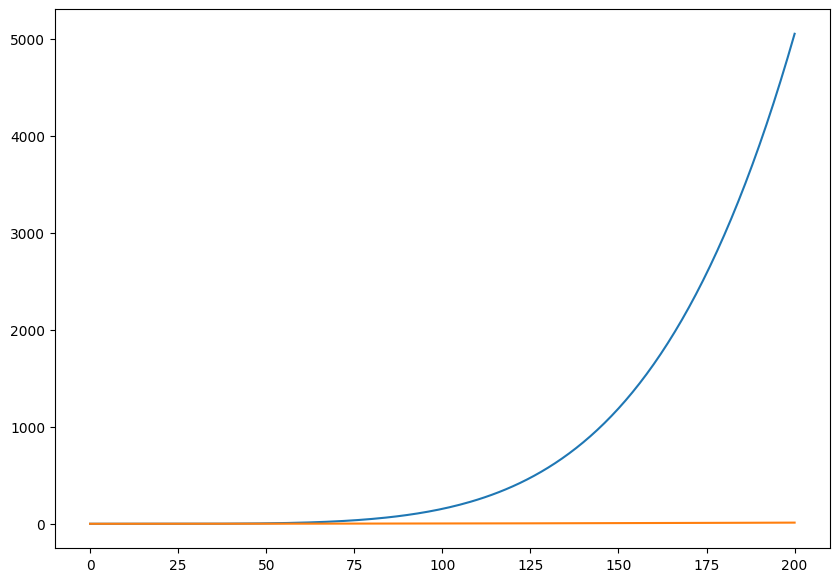

In [8]:

plt.figure(figsize=(10,7))

plt.plot(d2ydx2)
plt.plot(dydx)
plt.show

In [9]:
h = 0.000001


Using SimPy

In [ ]:
# !pip install sympy

In [11]:
import sympy as sp

In [12]:
sp.sqrt(3)

sqrt(3)

In [13]:
sp.sqrt(2)

sqrt(2)

In [14]:
sp.sqrt(4)

2

In [15]:
sp.sqrt(8)

2*sqrt(2)

In [16]:
from sympy import symbols

In [17]:
x, y = symbols('x y')
expres = x + 2*y
expres

x + 2*y

We can play around with it too!

In [18]:
(expres - 2 - 3*x)/2

-x + y - 1

In [19]:
expres = x*expres

Expansion of the above factored expression can be done by expand(expres) and can be brought back by factor(expres)

In [20]:
from sympy import expand, factor

In [21]:
expres = expand(expres)
expres

x**2 + 2*x*y

In [22]:
expres = factor(expres)
expres

x*(x + 2*y)

Let us now use the whole library

In [23]:
from sympy import *

In [24]:
x, y = symbols('x y')

In [25]:
init_printing(use_unicode=True)
# init_printing(pretty_print=True)

In [26]:
diff(sin(x)*exp(x), x)

In [27]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

In [28]:
integrate(sin(x**2), (x, -oo, oo))

In [29]:
limit(sin(x)/x, x, 0)

In [30]:
solve(x**2 - 1 + 7*y, x)

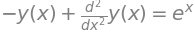

In [31]:
y = Function('y')
Eq(y(x).diff(x,x) - y(x), exp(x))

In [32]:
dsolve(Eq(y(x).diff(x,x) - y(x), exp(x)), y(x))

In [33]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def show_animation(fig, update_func, frames=100, interval=50, blit=True):
    """
    Display a matplotlib animation inline in Jupyter Notebook.
    
    Parameters:
    - fig: matplotlib type fig object
    - update_func: function(frame) -> list of frame to update
    - frames: number of frames in animation
    - interval: delay between frames in ms
    - blit: whether to use blitting for efficiency (was there in the function itself)
    """
    ani = FuncAnimation(fig, update_func, frames=frames, interval=interval, blit=blit)
    return HTML(ani.to_jshtml())


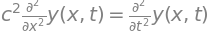

In [37]:
x, c, t, k = symbols('x c t k')
y = Function('y')
Eq((c**2)*(y(x, t).diff(x, x)), y(x, t).diff(t, t))

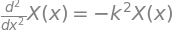

In [62]:
X = Function('X')
Eq((X(x).diff(x, x)),(X(x))*(-k**2))

In [75]:
Xx = dsolve(Eq((X(x).diff(x, x)),(X(x))*(-k**2)), X(x), ics = {X(0): 0})
Xx

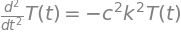

In [76]:
T = Function('T')
Eq((T(t).diff(t, t)),((c**2)*T(t))*(-k**2))

In [85]:
Tt = dsolve(Eq((T(t).diff(t, t)),((c**2)*T(t))*(-k**2)), T(t), ics = {T(0): 0})
Tt

In [86]:
y = Xx.rhs * Tt.rhs
y